# secant method by way of fixed point iteration

- relevant lectures:
  - [nmi_01_02_fpi.ipynb](https://github.com/mathstat-hunter/numerical-methods/blob/main/lectures/1%20core/topic%2001%20rootfinding/nmi_01_02_fpi.ipynb)
  - [nmi_01_04_newtons.ipynb](https://github.com/mathstat-hunter/numerical-methods/blob/main/lectures/1%20core/topic%2001%20rootfinding/nmi_01_02_newtons.ipynb)
  - [nmi_01_05_secant.ipynb](https://github.com/mathstat-hunter/numerical-methods/blob/main/lectures/1%20core/topic%2001%20rootfinding/nmi_01_05_secant.ipynb).

##### code, support

In [ ]:
if True: # settings for the people
  from copy import deepcopy # in case of python list vs numpy.array
  from itertools import count
  import math as m
  import matplotlib.animation
  import matplotlib.pyplot as plt
  import numpy as np
  import numpy.polynomial as npp
  import scipy as sp
  import statistics as st
  import textwrap
  from tabulate import tabulate

###### fpi

In [ ]:
# fpi, basic

def fpi(g,x,tol=1e-8,max_iter=100):
  count = 0
  gx = g(x)
  while (abs(gx-x) > tol) and (count < max_iter):
    x = gx
    gx = g(x)
    count += 1
  return x


In [ ]:
# fpi, expanded for lecture

def fpi_expanded(g,x,tol=1e-8,max_iter=100,worksheet=False):

  count = 0
  if worksheet:
    data = []

  gx = g(x)
  if worksheet:
    data.append([count,x])
  while (abs(gx-x) > tol) and (count < max_iter):
    x = gx
    gx = g(x)

    count += 1
    if worksheet:
      data.append([count,x])
  if worksheet:
    return data
  else:
    return x


###### code, secant

In [ ]:
# algorithm, expanded for lecture 01_02 # mod for secant

def fpi_secant(g,x,tol=1e-8,max_iter=100,worksheet=False):

  count = 0
  if worksheet:
    data = []

  gx = g(x)
  if worksheet:
    data.append([count,x[0]])
    count += 1
    data.append([count,x[1]])
  while (abs(gx[1]-x[1]) > tol) and (count < max_iter):
    x = gx
    gx = g(x)

    count += 1
    if worksheet:
      data.append([count,x[1]])
  if worksheet:
    return data
  else:
    return x


###### code, images in order of appearance

In [ ]:
def img_convergence(show="both"):
  """
  show : "plot" animation, "data" (as table), "both"
  """

  # prob-def
  g1 = lambda x: -1.5*x + 2.5
  g2 = lambda x: -0.5*x + 1.5
  ab = (0,2)
  h = 0.1
  h_plot = h/10

  # plot, cfg
  if show == "plot" or show == "both":
    plt.close("all")
    fig,axs = plt.subplots(1,2,figsize=(10,5))

  ws_all = []
  x0 = .8
  # prob-def, generalized
  for ig,(g,s_title,s_label) in enumerate(zip([g1,g2],\
      ["linear divergence","linear convergence"],\
      ["$g_1(x) = -\\frac{3}{2}x + \\frac{5}{2}$","$g_2(x) = -\\frac{1}{2}x + \\frac{3}{2}$"])):

    # calc
    ws = fpi_expanded(g,x0,max_iter=25,worksheet=True)
    ws_all.append(ws)

    if show == "plot" or show =="both": # output plot
      # g(x)
      s_grey = "0.5"
      axs[ig].plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
      xs_plot = np.arange(ab[0]-h,ab[1]+h+h_plot,h_plot)
      gs_plot = g(xs_plot)
      axs[ig].plot(xs_plot,gs_plot,label=s_label,c=s_grey)

      # fpi
      s_blue = "C00"
      xs = []; ys = []
      imax = min(len(ws),5) # 4 points
      for i in range(1,imax):
        xs.append(ws[i-1][1])
        ys.append(ws[i][1])
      axs[ig].scatter(xs,ys,c=s_blue,marker="*")

      # fpi vs x=y diagonal
      y0 = 0
      for x,y in zip(xs,ys):
        if y0 == 0:
          axs[ig].plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        else:
          axs[ig].plot([x,x],[y0,y],c=s_blue,alpha=0.5)
        axs[ig].arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
        y0 = y

      # plot, style
      axs[ig].set_title(s_title)
      axs[ig].grid()
      axs[ig].legend()

  if show == "plot" or show =="both":
    # plot, show
    plt.show()

  if show == "data" or show == "both": # output table
    ws_all = [cols12 + [cols13[1]] for cols12,cols13 in zip(ws_all[0],ws_all[1])]
    s_ifmt = "03d"
    if np.max(np.absolute(ws_all)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    if show == "data":
      print(s_title,"\n")
    else:
      print()
    if len(ws_all) > 10:
      print(tabulate(ws_all[0:6][:],headers=["i","r,dvg","r,cvg"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(ws_all[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(ws_all,headers=["i","r,dvg","r,cvg"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))


In [ ]:
def ani_newtons(show="ani"): # f(x) = -½x² + x + 1.5
  """
  show : "ani" animation, "plot", "data (as table)
  """
  if False: # original set of points # for completeness
    xs = np.array([-1,-0.5,0])
    ys = np.array([0,0.875,1.5])
    pc = np.polyfit(xs,ys,2)

    xs_plot = np.linspace(xs.min()-0.5,xs.max()+0.5,101)
    ys_plot = np.polyval(pc,xs_plot)

  # prob-def
  f = lambda x: -pow(x,2)/2 + x + 1.5
  df = lambda x: 1 - x
  g = lambda x: x - f(x)/df(x)

  # prod-def, interval
  ab = (-1,0)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  s_title = "some other example for newtons: $-\\frac{1}{2}x^2 + x + 1.5$"
  s_label = "{-\frac{1}{2}x^2 + x + 1.5}{1-x}"
  s_label = f"$g(x) = x - \\frac{s_label}$"

  # prob-def, run-time
  x0 = st.mean(ab)
  root = (sp.optimize.root(f,[x0])).x
  ws = fpi_expanded(g,x0,worksheet=True)

  # cfg, runtime
  iterations = 3

  # exxing types
  we = []; e0 = 0
  for w in ws:
    ei = abs(w[1]-root)
    if e0 != 0:
      ed = ei/pow(e0,2)
    else:
      ed = None
    e0 = ei
    we.append([w[0],w[1],ei,ed])

  if show == "ani": # output, animiation # True requires "ani" in a separate code cell
    # data, true, scatter
    h = 0.1
    xs = np.arange(ab[0],ab[1]+h,h)
    ys = f(xs)

    # data, true, plot
    h_plot = h/10
    xs_plot_a = ab[0]-h
    xs_plot_b = ab[1]+h
    xs_plot = np.arange(xs_plot_a,xs_plot_b+h_plot,h_plot)
    ys_plot = f(xs_plot)

    # plot, cofg
    plt.close("all")
    # plot, animation
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 100
    plt.ioff()
    fig,ax = plt.subplots()
    index = count() # used in animate()

    # plot, actual
    ax.plot(xs_plot,ys_plot,zorder=1)
    ax.set_xlim(xs_plot_a,xs_plot_b)
    ymin = m.floor(ys_plot.min()/h)*h - h
    ymax = m.ceil(ys_plot.max()/h)*h + h
    ax.set_ylim(ymin,ymax)
    ax2 = ax.twinx()
    ax.set_title(s_title)
    ax.grid()

    # plot, iterations
    zorder = 10
    ws = np.array(ws) # for referential
    def animate(t):
      ax2.cla()
      k = next(index)
      if k == 2:
        ax.scatter(root,f(root),color="C01",marker="*",s=200,zorder=2)
      if k > 2:
        step = 3
        imax = k - 2 # first frame on ax2
        for iset in range(0,imax,step):
          i = iset // step
          color = f"C{i+2:02d}" # C02,C03,C04,...

          jmax = min(imax-iset,step)
          for j in range(jmax):
            if j > 1:
              x = ws[i,1]
              x1 = ws[i+1,1]
              y = f(x)
              ya = y*((xs_plot_a-x)/(x-x1) + 1)
              yb = y*((xs_plot_b-x)/(x-x1) + 1)
              ax2.plot([xs_plot_a,xs_plot_b],[ya,yb],label="$m_{i}$",color=color)
            else:
              if j == 0:
                x = ws[i,1]
                xs_j = [x]
                ys_j = [0]
                acbs = ["x"]
              elif j == 1:
                x = ws[i,1]
                xs_j = [x]
                ys_j = [f(x)]
                acbs = ["y"]
              ax2.scatter(xs_j,ys_j,color=color,zorder=zorder+i)
              for acb,x,y in zip(acbs,xs_j,ys_j):
                label = "$" + acb+ "_{" + str(i) + "}$"
                ax2.text(x-h_plot*2,y-h,label,color=color,fontweight="bold",zorder=zorder*2)

      # inside ani function!!
      ax2.set_xlim(xs_plot_a,xs_plot_b)
      ax2.set_ylim(ymin,ymax)

    ani = matplotlib.animation.FuncAnimation(fig,animate,frames=11,interval=11)
    return ani

  elif show == "plot": # output, cobweb plot
    # plot, cfg
    plt.close("all")

    # g(x)
    s_grey = "0.5"
    plt.plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
    xs_plot = np.arange(ab[0]-h,ab[1]+h_plot/2,h_plot)
    gs_plot = g(xs_plot)
    plt.plot(xs_plot,gs_plot,label=s_label,c=s_grey)

    # fpi
    s_blue = "C00"
    xs = []; ys = []
    imax = min(len(ws),5)
    for i in range(1,imax):
      xs.append(ws[i-1][1])
      ys.append(ws[i][1])
    plt.scatter(xs,ys,c=s_blue,marker="*")

    # fpi vs x=y diagonal
    y0 =0
    for x,y in zip(xs,ys):
      if y0 == 0:
        plt.plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
      else:
        plt.plot([x,x],[y0,y],c=s_blue,alpha=0.5)
      plt.arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
      y0 = y

    # plot, style
    plt.title(f"{s_title}, {s_label}")
    plt.grid()
    plt.legend()
    # plot, show
    plt.show()

  else: # output, table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    print(f"\n{s_title}. x0 = {x0}.\n")
    if len(we) > 10:
      print(tabulate(we[0:6][:],headers=["i","x[i]","e[i]",'"/e[i-1]^2'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(we[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(we,headers=["i","x[i]","e[i]",'"/e[i-1]^2'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))


In [ ]:
# example 16, secant method for example 01

def eg_16(show="ani"):
  """
  show : "ani" animation, "data (as table)
  """

  # prob-def
  f = lambda x: pow(x,3) + x - 1
  df = lambda x: 2*pow(x,2) + 1
  df2 = lambda x: 4*x
  dq = lambda x1,x0 : (f(x1)-f(x0))/(x1-x0) # kinda lotta same calls = meh?
  def g(x): # secant method
    rc = deepcopy(x) # not necessarily numpy
    rc[1] = x[1] - f(x[1])/dq(x[1],x[0])
    rc[0] = x[1]
    return rc

  ab = (-1,1)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  s_title = f"example 16 ~ example 01 w secants"
  s_label = "{x^3 + x - 1}{3x^2 + 1}"
  s_label = f"$g(x) = x - \\frac{s_label}$"

  # prob-def, runtime
  x0 = [0,1]
  # calc
  root = (sp.optimize.root(f,[x0[0]])).x
  ws = fpi_secant(g,x0,tol=5e-16,worksheet=True)

  # cfg, runtime
  iterations = 4

  # exxing types
  α = (1 + m.sqrt(5))/2 # for supralinear convergence
  sm = pow(abs(df2(root)/(2*df(root))),α-1)
  s_title += f"\nand expected rate of convergence: {sm[0]}"
  we = []; e0 = 0
  for w in ws:
    ei = abs(w[1]-root)
    if e0 != 0:
      ed = ei/pow(e0,α)
    else:
      ed = None
    e0 = ei
    we.append([w[0],w[1],ei,ed])

  if show == "ani": # output, animiation # True requires "ani" in a separate code cell

    # data, true, scatter
    h = 0.1
    xs = np.arange(ab[0],ab[1]+h,h)
    ys = f(xs)

    # data, true, plot
    h_plot = h/10
    xs_plot_a = ab[0]-h
    xs_plot_b = ab[1]+h
    xs_plot = np.arange(xs_plot_a,xs_plot_b+h_plot,h_plot)
    ys_plot = f(xs_plot)

    # plot, cfg
    plt.close("all")
    fig,ax = plt.subplots()
    # plot, animation
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 100
    plt.ioff()
    iani = count() # used in animate()

    # plot, actual
    ax.plot(xs_plot,ys_plot,zorder=1)
    ax.set_xlim(xs_plot_a,xs_plot_b)
    ymin = m.floor(ys_plot.min()/h)*h - h
    ymax = m.ceil(ys_plot.max()/h)*h + h
    ax.set_ylim(ymin,ymax)
    ax2 = ax.twinx()
    ax.set_title(s_title,pad=10)
    ax.grid()

    # plot, iterations
    zorder = 10
    ws = np.array(ws) # for referential
    def animate(t):
      ax2.cla()
      k = next(iani)
      if k == 2:
        ax.scatter(root,f(root),color="C01",marker="*",s=200,zorder=2)
      if k > 2:
        if k < 5:
          step = 2
          di = 0
        else:
          step = 3
          di = 1
        imax = k - 2 + di # first frame on ax2 # x0, no secant
        for iset in range(0,imax,step):
          i = iset // step
          color = f"C{i+2:02d}" # C02,C03,C04,...

          jmax = min(imax-iset,step)
          for j in range(jmax):
            if j > 1:
              if i > 0:
                x = ws[i,1]
                x1 = ws[i+1,1]
                y = f(x)
                ya = y*((xs_plot_a-x)/(x-x1) + 1)
                yb = y*((xs_plot_b-x)/(x-x1) + 1)
                ax2.plot([xs_plot_a,xs_plot_b],[ya,yb],label="$m_{i}$",color=color)
              else:
                j += 1
            else:
              if j == 0:
                x = ws[i,1]
                xs_j = [x]
                ys_j = [0]
                acbs = ["x"]
              elif j == 1:
                x = ws[i,1]
                xs_j = [x]
                ys_j = [f(x)]
                acbs = ["y"]
              ax2.scatter(xs_j,ys_j,color=color,zorder=zorder+i)
              for acb,x,y in zip(acbs,xs_j,ys_j):
                label = "$" + acb+ "_{" + str(i) + "}$"
                ax2.text(x-h_plot*2,y-h*2,label,color=color,fontweight="bold",zorder=zorder*2)

      # inside ani function!!
      ax2.set_xlim(xs_plot_a,xs_plot_b)
      ax2.set_ylim(ymin,ymax)

    n_frames = 2 + 2 + (iterations-1)*3 + 1 # root + x0 + (i-1)*(x+y+m) + 1
    ani = matplotlib.animation.FuncAnimation(fig,animate,frames=n_frames,interval=n_frames)
    return ani

  else: # output, table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".14e"
    else:
      s_ffmt = ".14f"
    print(f"\n{s_title}. x0 = {x0}.\n")
    if len(we) > 10:
      print(tabulate(we[0:6][:],headers=["i","x[i]","e[i]",'"/e[i-1]^α'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(we[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(we,headers=["i","x[i]","e[i]",'"/e[i-1]^α'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))


## fixed point iteration (fpi)

1. restate problem $f(x) = 0$ into form $g(x) = x$.
2. iterate from initial guess $x_0$.
  - <b>algorithm, fpi:</b> $\enspace \bf{x_{i+1} = g(x_i)}$.

```python
# text of exact python code provided ~ ie, not pseudocode

def fpi(g,x,tol=1e-8,max_iter=100):
  count = 0
  gx = g(x)
  while (abs(gx-x) > tol) and (count < max_iter):
    x = gx
    gx = g(x)
    count += 1
  return x
```

- "tol=1e-8,max_iter=100". "=" sets a default if that argument is not given by user. ie, a default value means the argument is optional.
- variable names should relate to their purpose.
  - eg, "gx = g(x)". "gx" holds the value of function "g" given value "x".
- the loop that increments $x_{i+1} = g(x_i)$ stops if the increment meets the tolerance limit or if it exceeds the maximum number of increments allowed.

- <b>NOTE: what the function / numerical method critically needs is the function $\bf{g}$ and its first guess at root $\bf{x_0}$.</b>

so if you look inside method "img_convergence" (referenced below, supplied above), you will see a call for "fpi(...)". that and the definition of $g$ and $x_0$ <b>is what is needed</b> (as stated immediately above). the rest of that method "img_convergence" is for output. (generally, the code to steal will be prefixed "eg_" and belong to their notebooks numbered examples. "img_" tends to be more complex, more than you need.)

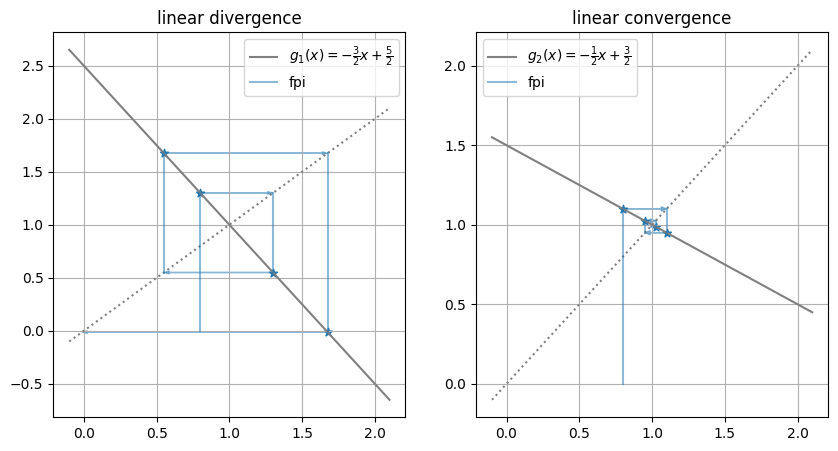


|   i |           r,dvg |          r,cvg |
|-----|-----------------|----------------|
| 000 |  8.00000000e-01 | 8.00000000e-01 |
| 001 |  1.30000000e+00 | 1.10000000e+00 |
| 002 |  5.50000000e-01 | 9.50000000e-01 |
| 003 |  1.67500000e+00 | 1.02500000e+00 |
| 004 | -1.25000000e-02 | 9.87500000e-01 |
| 005 |  2.51875000e+00 | 1.00625000e+00 |
|-----|-----------------|----------------|
| 021 |  9.98577019e+02 | 1.00000010e+00 |
| 022 | -1.49536553e+03 | 9.99999952e-01 |
| 023 |  2.24554829e+03 | 1.00000002e+00 |
| 024 | -3.36582244e+03 | 9.99999988e-01 |
| 025 |  5.05123366e+03 | 1.00000001e+00 |


In [ ]:
img_convergence() # convergence relies on rate of change / first derivative, surprise!!

## newton-raphson, as fpi

- quick derivation: $\enspace \tan\,\theta = \frac{f(x_0)}{x_0 - x_1} = f'(x_0) \overbrace{\implies}^{\text{algebra!!}} x_{i+1} = x_i - \frac{f(x_0)}{f'(x_0)}$.

<mark><b>ie, for newtons method, $\bf{g}$ is ALWAYS</b> $\enspace \bf{g(x): x_{i+1} = x_i - \frac{f(x_0)}{f'(x_0)}}$.</mark>

and what you need to provide for the numerical method is $f(x), f'(x)$ and $x_0$. you do need to provide that $g$, but you only need to code it once no matter how many $f, f',x_0$ you need to use it with.

```python
  # prob-def
  f = lambda x: -pow(x,2)/2 + x + 1.5
  df = lambda x: 1 - x
  g = lambda x: x - f(x)/df(x)
  ```

- inside the above excerpt from method "ani_newtons", you can see the declarations for $f,f',g$.
- $x_0$ is provided at the call for "fpi_extended" (which returns the fpi workspace, vs "fpi" which only returns the root).

- a quick example in entirety (for the animation below)

```python
  # prob-def
  f = lambda x: -pow(x,2)/2 + x + 1.5
  df = lambda x: 1 - x
  g = lambda x: x - f(x)/df(x)

  # calc
  root = fpi(g,x=-0.5) # root only, no workspace
  print(root)
```

In [ ]:
ani = ani_newtons() # set player to "ONCE" then step through frame-by-frame
ani

## secant method, as fpi

in case of no access to or studiously withheld derivative, replace the derivative with a difference quotient. ie, replace tangent line with secant line through previous two guesses. ie, approximation for derivative at $x_i$ is difference quotient

\begin{align}
  q(x_i,x_{i-1}) &= \frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}} \approx f'(x_i) \\ \\
  &\Downarrow \\ \\
  x_0,x_1 &= \text{initial guesses} \\ \\
  x_{i+1} &= x_i - f(x_i)\cdot \underbrace{\frac{x_i-x_{i-1}}{f(x_i)-f(x_{i-1})}}_{\approx \tfrac{1}{f'(x_i)}} = \underbrace{x_i - \frac{f(x_i)}{q(x_i,x_{i-1})}}_{g(x_i,x_{i-1})}
\end{align}

- <b>so <mark>programmatically, the difference between secant and newtons is the addition of a second initial guess value.</mark></b>

now, when you open up method "eg_16" <font color=green>you will see a lot of stuff bc i do far more than you will need for the homework</font>. instead, go by whats stated immediately above, and you will need:

- $x_0,x_1$, the intial guesses. (set $x_1 = x_0 * 1.1$ or similar.)
- $f(x)$;
- $q(x)$ for use in $g(x)$ instead of $f'(x)$; and
- $g(x)$ which will be similar to $g(x)$ for newtons.
  - the dissimilarity will be the additional initial guess (to approximate rate of change).

- a quick example in entirety (for the animation below)

```python
  from copy import deepcopy

  # prob-def
  f = lambda x: pow(x,3) + x - 1
  dq = lambda x1,x0 : (f(x1)-f(x0))/(x1-x0) # lotta calls = oh wells
  def g(x): # secant method
    rc = deepcopy(x) # if python list vs numpy.array
    rc[1] = x[1] - f(x[1])/dq(x[1],x[0])
    rc[0] = x[1]
    return rc

  # calc
  root = fpi_secant(g,[0,1])
  print(root[0])
```

- "rc" = "return code". its an old-fashioned comsci/engineering thing.
- note: input $x = [x_i,x_{i-1}]$ and output $\text{rc} = x_{\text{root}} = [x_{i+1},x_{i}]$.

ie, <b>output root is "root[0]".</b> to reiterate, this is bc
- this is secant method and
- initial $x_0 = [0,1]$ vs a single $x_0$ and
- the returned $x_{\text{root}}$ will be in kind.

In [ ]:
ani = eg_16() # set player to "ONCE" then step through frame-by-frame
ani

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/>